In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [53]:
cricket_data = pd.read_csv("Cricket-all-teams-all-matches.csv")

In [54]:
cricket_data.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
0,India,Pakistan,drawn,NaN,Bengaluru,"Dec 8-12, 2007",Test # 1852,Test
1,India,Pakistan,drawn,NaN,Eden Gardens,"Nov 30-Dec 4, 2007",Test # 1850,Test
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test
4,Pakistan,India,drawn,NaN,Faisalabad,"Jan 21-25, 2006",Test # 1782,Test


In [55]:
# Remove drawn games
new_cricket_data = cricket_data.dropna()

In [56]:
#Restrict Data to just Test matches
test_cricket_data = new_cricket_data.loc[new_cricket_data['Format'] == 'Test ', :]

In [57]:
#Add Year Column
test_cricket_data['Year'] = test_cricket_data['Match Date'].str[-4:]

C:\Users\krish\AppData\Local\Temp\ipykernel_7600\280095735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cricket_data['Year'] = test_cricket_data['Match Date'].str[-4:]


In [58]:
#creating a new column that stores a boolean that tracks whether the home team (stored in 'Team 1' column) won the match ('Winner' column should be the same team)
test_cricket_data['Home Wins'] = test_cricket_data['Team 1'] == test_cricket_data['Winner']
test_cricket_data.head()

C:\Users\krish\AppData\Local\Temp\ipykernel_7600\2972965125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cricket_data['Home Wins'] = test_cricket_data['Team 1'] == test_cricket_data['Winner']


,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Year,Home Wins
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test,2007,True
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test,2006,True
6,India,Pakistan,Pakistan,168 runs,Bengaluru,"Mar 24-28, 2005",Test # 1743,Test,2005,False
7,India,Pakistan,India,195 runs,Eden Gardens,"Mar 16-20, 2005",Test # 1741,Test,2005,True
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,"Apr 13-16, 2004",Test # 1697,Test,2004,False


In [59]:
#Sort Data By Year
test_cricket_data_sorted = test_cricket_data.sort_values('Year', ascending=True).groupby(['Year', 'Team 1'])
test_cricket_data_sorted.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Year,Home Wins
3944,Australia,England,England,4 wickets,Melbourne,"Mar 31-Apr 4, 1877",Test # 2,Test,1877,False
3945,Australia,England,Australia,45 runs,Melbourne,"Mar 15-19, 1877",Test # 1,Test,1877,True
3943,Australia,England,Australia,10 wickets,Melbourne,"Jan 2-4, 1879",Test # 3,Test,1879,True
3942,England,Australia,England,5 wickets,The Oval,"Sep 6-8, 1880",Test # 4,Test,1880,True
3939,Australia,England,Australia,6 wickets,Sydney,"Mar 3-7, 1882",Test # 7,Test,1882,True
...,...,...,...,...,...,...,...,...,...,...
971,South Africa,Pakistan,South Africa,10 wickets,Cape Town,"Jan 3-6, 2025",Test # 2576,Test,2025,True
4601,Sri Lanka,Australia,Australia,inns & 242 runs,Galle,"Jan 29-Feb 1, 2025",Test # 2579,Test,2025,False
4600,Sri Lanka,Australia,Australia,9 wickets,Galle,"Feb 6-9, 2025",Test # 2580,Test,2025,False
3493,Zimbabwe,Afghanistan,Afghanistan,72 runs,Bulawayo,"Jan 2-6, 2025",Test # 2574,Test,2025,False


In [60]:
#Add Wins-Per-Year Column
wins_per_year_team = test_cricket_data_sorted.size().reset_index(name='Wins')
wins_per_year_team.head()

,Year,Team 1,Wins
0,1877,Australia,2
1,1879,Australia,1
2,1880,England,1
3,1882,Australia,2
4,1882,England,1


In [61]:
#home_games = test_cricket_data_sorted[test_cricket_data_sorted['Team 1'] == team_name]
#home_wins = home_games[home_games['winner'] == team_name].shape[0]

In [62]:
test_cricket_data_sorted.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Year,Home Wins
3944,Australia,England,England,4 wickets,Melbourne,"Mar 31-Apr 4, 1877",Test # 2,Test,1877,False
3945,Australia,England,Australia,45 runs,Melbourne,"Mar 15-19, 1877",Test # 1,Test,1877,True
3943,Australia,England,Australia,10 wickets,Melbourne,"Jan 2-4, 1879",Test # 3,Test,1879,True
3942,England,Australia,England,5 wickets,The Oval,"Sep 6-8, 1880",Test # 4,Test,1880,True
3939,Australia,England,Australia,6 wickets,Sydney,"Mar 3-7, 1882",Test # 7,Test,1882,True
...,...,...,...,...,...,...,...,...,...,...
971,South Africa,Pakistan,South Africa,10 wickets,Cape Town,"Jan 3-6, 2025",Test # 2576,Test,2025,True
4601,Sri Lanka,Australia,Australia,inns & 242 runs,Galle,"Jan 29-Feb 1, 2025",Test # 2579,Test,2025,False
4600,Sri Lanka,Australia,Australia,9 wickets,Galle,"Feb 6-9, 2025",Test # 2580,Test,2025,False
3493,Zimbabwe,Afghanistan,Afghanistan,72 runs,Bulawayo,"Jan 2-6, 2025",Test # 2574,Test,2025,False


In [63]:
home_games_won = test_cricket_data.sort_values('Year', ascending=True).groupby(['Year', 'Team 1'])['Home Wins'].sum()
home_games_won

Year  Team 1      
1877  Australia       1
1879  Australia       1
1880  England         1
1882  Australia       2
      England         0
                     ..
2025  Australia       1
      Pakistan        1
      South Africa    1
      Sri Lanka       0
      Zimbabwe        0
Name: Home Wins, Length: 582, dtype: int64

In [64]:
wins_per_year_team

,Year,Team 1,Wins
0,1877,Australia,2
1,1879,Australia,1
2,1880,England,1
3,1882,Australia,2
4,1882,England,1
...,...,...,...
577,2025,Australia,1
578,2025,Pakistan,2
579,2025,South Africa,1
580,2025,Sri Lanka,2


In [65]:
home_games = pd.merge(wins_per_year_team, home_games_won, how='left', on=['Year', 'Team 1'])
home_games['Home Wins'] = home_games['Home Wins'].astype(np.int64)
home_games

,Year,Team 1,Wins,Home Wins
0,1877,Australia,2,1
1,1879,Australia,1,1
2,1880,England,1,1
3,1882,Australia,2,2
4,1882,England,1,0
...,...,...,...,...
577,2025,Australia,1,1
578,2025,Pakistan,2,1
579,2025,South Africa,1,1
580,2025,Sri Lanka,2,0


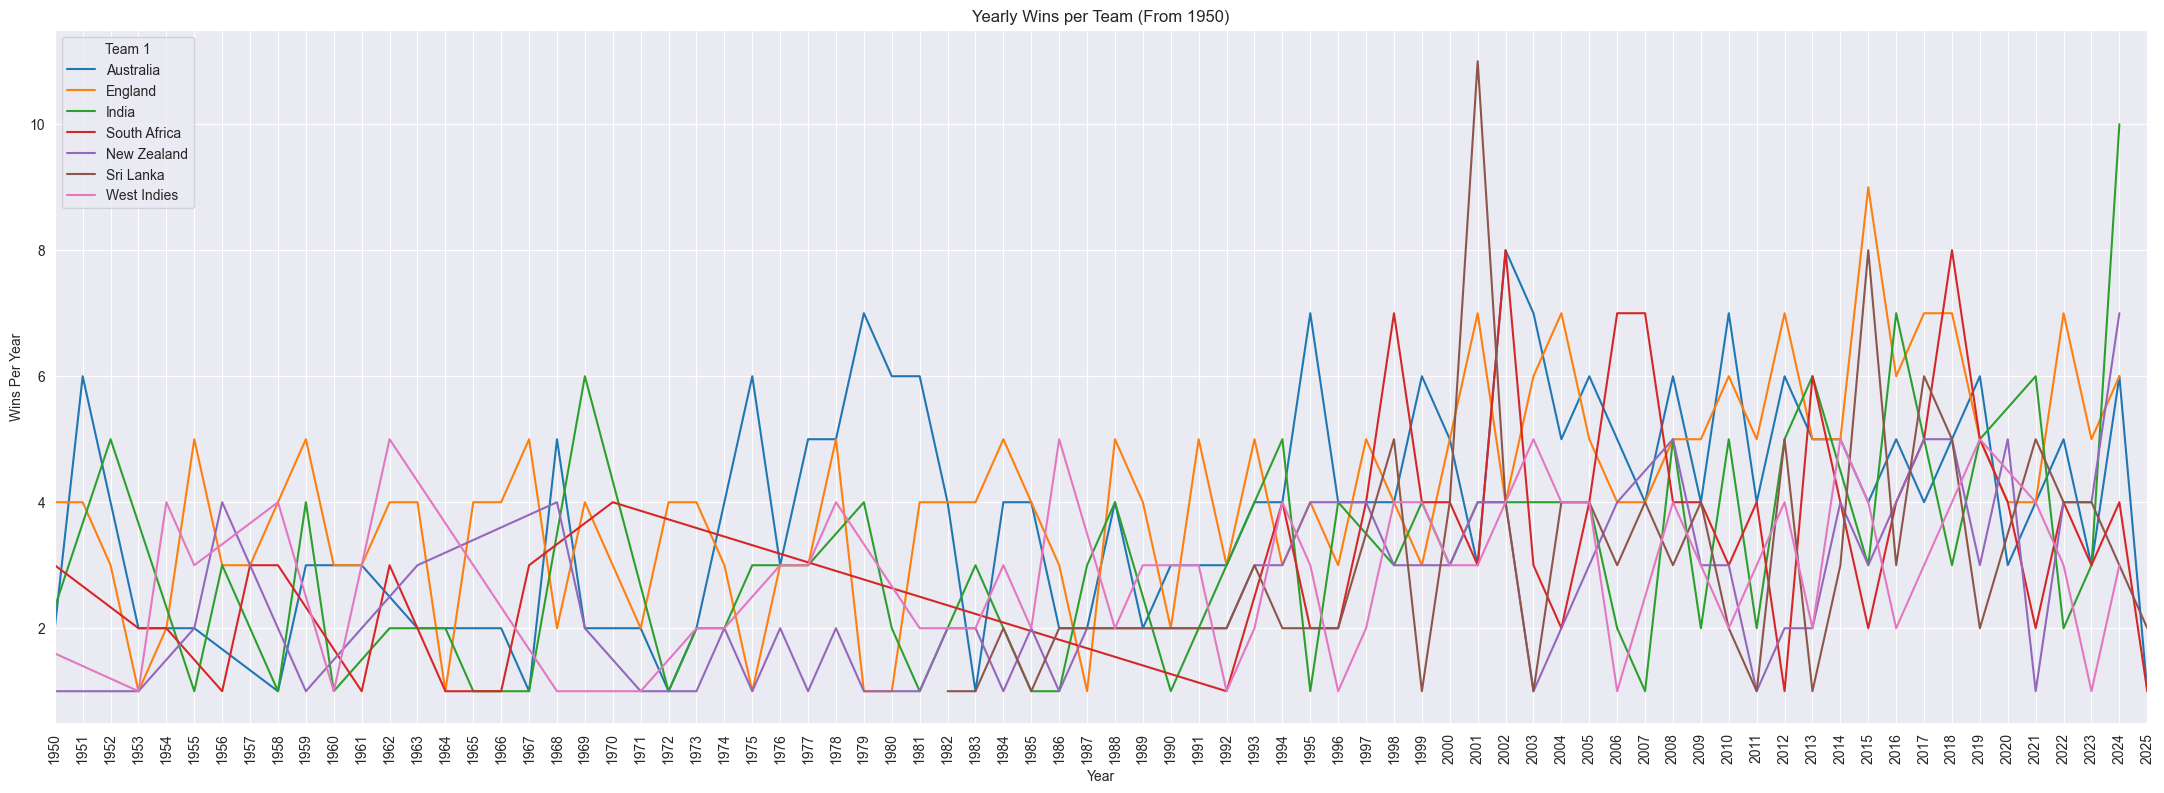

In [70]:
#From the last project, the data shows that up until 1950, only ENG, AUS and SA were the only 3 nations participating in Test cricket. Thus, we will limit our data to matches after 1950.
#Also, I analyzed that nations like Ireland, Afghanistan, Zimbabwe, Bangladesh never demonstrated dominance in this format of cricket with the data provided.
#So, I have omitted them to make the graph less loaded and more concise with the information we need.

plt.figure(figsize=(27, 9))
sn.lineplot(data=home_games, x='Year', y='Wins', hue='Team 1', hue_order = ['Australia', 'England', 'India', 'South Africa', 'New Zealand', 'Sri Lanka', 'West Indies'])

plt.title('Yearly Wins per Team (From 1950)')
plt.xlabel('Year')
plt.ylabel('Wins Per Year')
plt.grid(True)
plt.xticks(rotation=90)
plt.xlim(58, 133)
plt.show()

In [98]:
#Prepare Data for Plotting
# To plot both 'Total Wins' and 'Home Wins' with Seaborn's hue or style
# we need to melt the DataFrame so that 'Total Wins' and 'Home Wins' become
# values under a new 'Win Type' column.

home_games_melted = home_games.melt(id_vars=['Year', 'Team 1'],
                            value_vars=['Wins', 'Home Wins'],
                            var_name='Win Type',
                            value_name='# Wins')

home_games_melted.head()

,Year,Team 1,Win Type,# Wins
0,1877,Australia,Wins,2
1,1879,Australia,Wins,1
2,1880,England,Wins,1
3,1882,Australia,Wins,2
4,1882,England,Wins,1


In [96]:
#Creating a pivot table to make separate columns for Home, Away, and Total Wins

home_and_away_data = home_games_melted.pivot_table(
    index=['Year', 'Team 1'],
    columns='Win Type',       # The unique values in 'Win Type' will become new columns
    values='# Wins'
).reset_index()

home_games_melted.columns.name = None # Remove the name of the columns index

home_and_away_data['Away Wins'] = home_and_away_data['Wins'] - home_and_away_data['Home Wins']
home_and_away_data

Win Type,Year,Team 1,Home Wins,Wins,Away Wins
0,1877,Australia,1.0,2.0,1.0
1,1879,Australia,1.0,1.0,0.0
2,1880,England,1.0,1.0,0.0
3,1882,Australia,2.0,2.0,0.0
4,1882,England,0.0,1.0,1.0
...,...,...,...,...,...
577,2025,Australia,1.0,1.0,0.0
578,2025,Pakistan,1.0,2.0,1.0
579,2025,South Africa,1.0,1.0,0.0
580,2025,Sri Lanka,0.0,2.0,2.0


In [116]:
#Melting the Home and Away Wins columns to create a 'Win Location' column - this will help when graphing the data
home_and_away_melted = home_and_away_data.melt(id_vars=['Team 1', 'Year'],
                                value_vars=['Home Wins', 'Away Wins'],
                                var_name='Win Location',
                                value_name='Total Wins')
home_and_away_melted

,Team 1,Year,Win Location,Total Wins
0,Australia,1877,Home Wins,1.0
1,Australia,1879,Home Wins,1.0
2,England,1880,Home Wins,1.0
3,Australia,1882,Home Wins,2.0
4,England,1882,Home Wins,0.0
...,...,...,...,...
1159,Australia,2025,Away Wins,0.0
1160,Pakistan,2025,Away Wins,1.0
1161,South Africa,2025,Away Wins,0.0
1162,Sri Lanka,2025,Away Wins,2.0


In [117]:
#Aggregating the data above so it sums all of each country's home and away wins
home_and_away_aggregated = home_and_away_melted.groupby(['Team 1', 'Win Location']).agg(
    Total_Wins = ('Total Wins', 'sum')
).reset_index()

home_and_away_aggregated

,Team 1,Win Location,Total_Wins
0,Afghanistan,Away Wins,3.0
1,Afghanistan,Home Wins,2.0
2,Australia,Away Wins,107.0
3,Australia,Home Wins,269.0
4,Bangladesh,Away Wins,52.0
5,Bangladesh,Home Wins,13.0
6,England,Away Wins,135.0
7,England,Home Wins,237.0
8,India,Away Wins,59.0
9,India,Home Wins,120.0


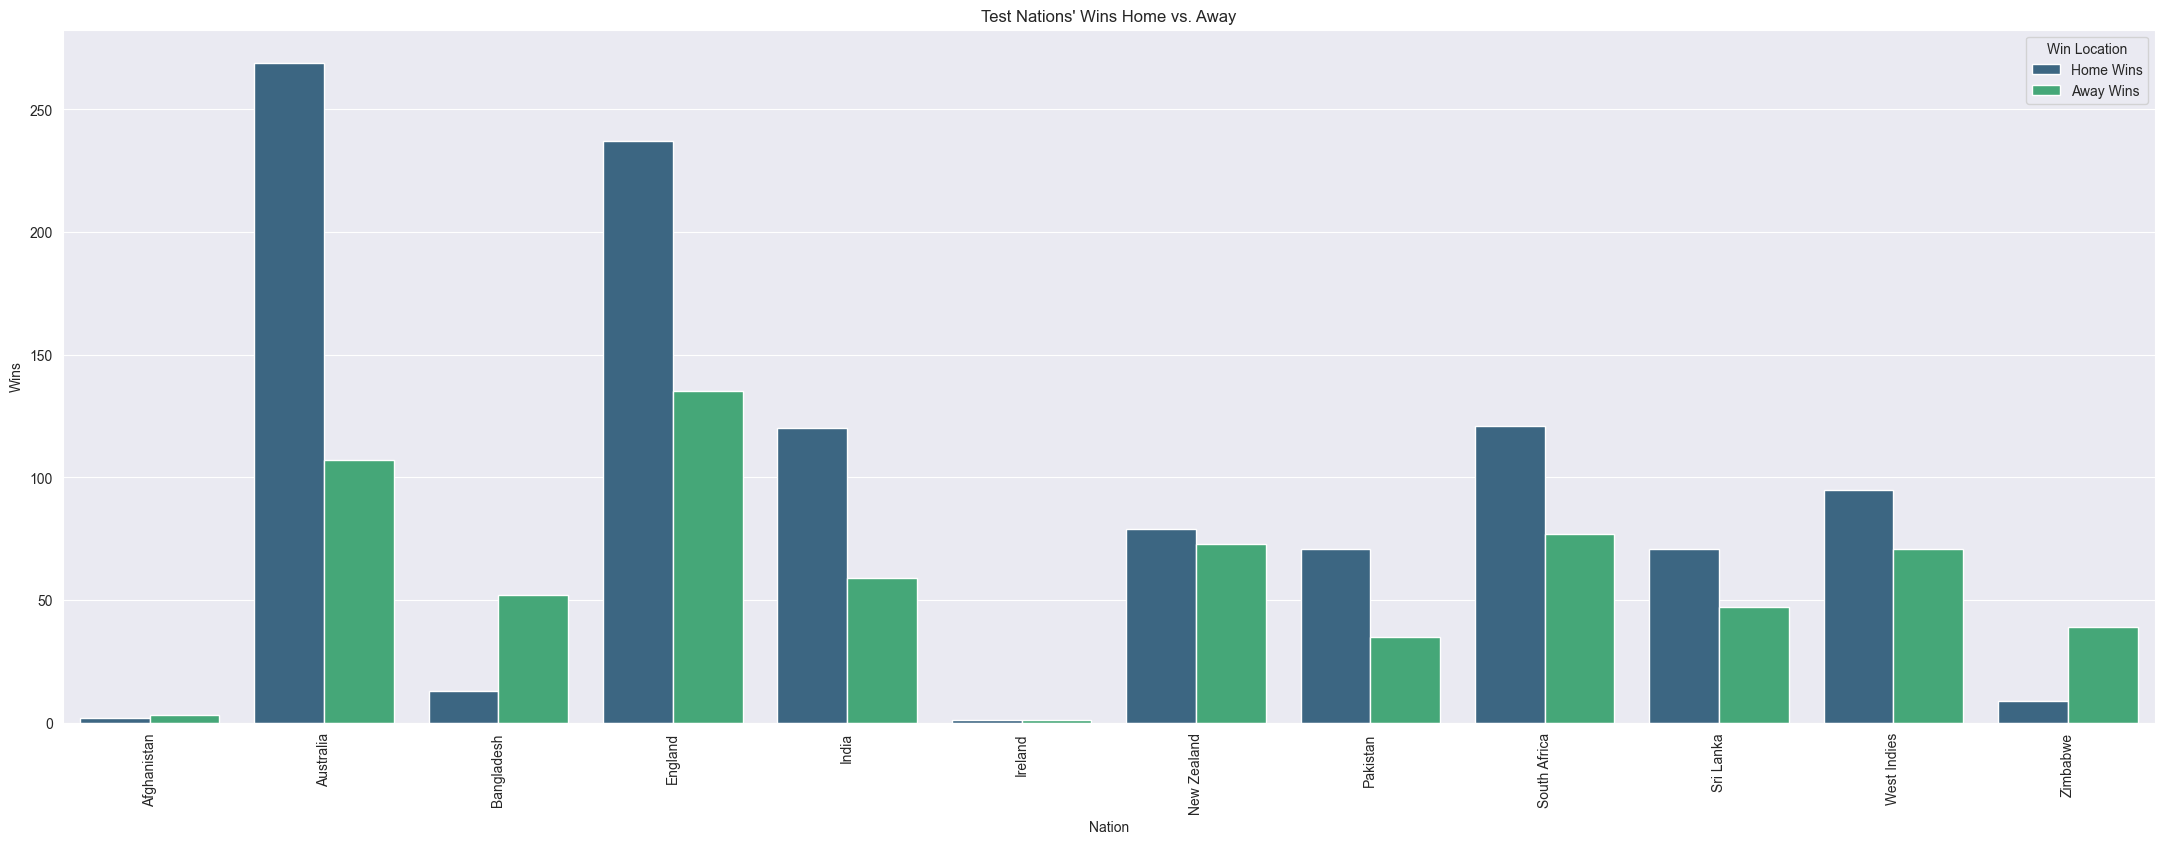

In [118]:
#Graphing our final data onto a bar graph with Seaborn

plt.figure(figsize=(27, 9))

sn.barplot(data=home_and_away_aggregated,
            x='Team 1',
            y='Total_Wins',
            hue='Win Location', # This creates separate bars/colors for 'Home Wins' and 'Away Wins'
            hue_order = ['Home Wins', 'Away Wins'],
            palette='viridis')


plt.title('Test Nations\' Wins Home vs. Away')
plt.xlabel('Nation')
plt.ylabel('Wins')
plt.xticks(rotation=90)
plt.show()